In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [82]:
food = pd.read_csv("data/food_crises_cleaned.csv")
food = food[['ipc','year','month','district']]
food = food[food['district'] == 'Rubkona']
articles = pd.read_csv("data/articles_handlabeled_v2_cleaned.csv")

print(food)

       ipc  year  month district
10902  NaN  2007      1  Rubkona
10903  NaN  2007      2  Rubkona
10904  NaN  2007      3  Rubkona
10905  NaN  2007      4  Rubkona
10906  NaN  2007      5  Rubkona
...    ...   ...    ...      ...
11055  3.0  2019     10  Rubkona
11056  NaN  2019     11  Rubkona
11057  NaN  2019     12  Rubkona
11058  NaN  2020      1  Rubkona
11059  3.0  2020      2  Rubkona

[158 rows x 4 columns]


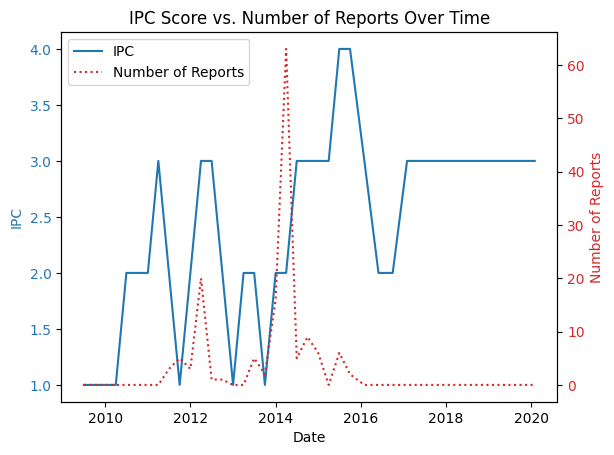

In [96]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert the 'year' and 'month' columns to datetime format in the 'food' DataFrame
food['Date'] = pd.to_datetime(food['year'].astype(str) + '-' + food['month'].astype(str) + '-01')
food.dropna(subset=['ipc'], inplace=True)

# Convert the 'date' column to datetime format in the 'articles' DataFrame
articles['Date'] = pd.to_datetime(articles['date'])

# Set 'Date' as the index for both dataframes
food.set_index('Date', inplace=True)
articles.set_index('Date', inplace=True)

# Extract year and month from the 'Date' column in 'articles'
articles['Year'] = articles.index.year
articles['Month'] = articles.index.month

# Manually count the number of articles for each month
articles_count = articles.groupby(['Year', 'Month']).size().reset_index(name='Number_of_Reports')

# Calculate the average IPC score for each month
average_ipc = food.groupby(['year', 'month'])['ipc'].mean().reset_index(name='IPC')  # Rename to 'IPC' here

# Merge the two datasets based on the common 'Year' and 'Month' columns
merged_data = pd.merge(average_ipc, articles_count, left_on=['year', 'month'], right_on=['Year', 'Month'], how='left')

# Create a datetime column for the 'Date' index
merged_data['Date'] = pd.to_datetime(merged_data['year'].astype(str) + '-' + merged_data['month'].astype(str) + '-01')

# Set 'Date' as the index
merged_data.set_index('Date', inplace=True)

# Fill missing values in 'Number_of_Reports' with 0
merged_data['Number_of_Reports'].fillna(0, inplace=True)

fig, ax1 = plt.subplots()

# Left Y axis: IPC scores and Average IPC as line plots
ax1.set_xlabel('Date')
ax1.set_ylabel('IPC', color='tab:blue')

# Plot the IPC line without filling the area underneath
ipc_line = ax1.plot(merged_data.index, merged_data['IPC'], color='tab:blue', linestyle='-', label='IPC')  # Update label to 'IPC'

ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second Y axis on the right for Number of reports/articles
ax2 = ax1.twinx()
ax2.set_ylabel('Number of Reports', color='tab:red')

# Create a continuously dotted line for Number of Reports
reports_line = ax2.plot(merged_data.index, merged_data['Number_of_Reports'], color='tab:red', linestyle=':', label='Number of Reports')  # Add label here

ax2.tick_params(axis='y', labelcolor='tab:red')

# Set x-axis label
ax1.set_xlabel('Date')

# Display the legend with both lines and labels
lines = ipc_line + reports_line  # Include both lines in the legend
labels = [line.get_label() for line in lines]  # Get labels for both lines
ax1.legend(lines, labels, loc='upper left')

# Display the plot
plt.title('IPC Score vs. Number of Reports Over Time')
plt.show()
